In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from time import sleep

pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set()

In [2]:
def construir_linea(sorteo, fecha, tiposorteo, winner, nuevo,n1,n2,n3,n4,n5, sb):
    salida = str(sorteo) + "," + str(fecha) + "," + str(tiposorteo) + "," + str(winner) + "," + str(nuevo) + "," + str(n1) + "," + str(n2) + "," + str(n3) + "," + str(n4) + "," + str(n5) + "," + str(sb)
    return salida

In [3]:
sorteo = int(input("Dígame el numero del sorteo: "))
if(sorteo > 0 ):
    fecha = input(f"ingresa la fecha del sorteo en formato dd/MM/aaaa: {sorteo}: ")
    winner = input(f"ingresa en mayuscula SI o NO, si el sorteo {sorteo} entrego premio mayor o no: ")
    nuevo = input(f"ingresa en mayuscula SI o NO, si el sorteo {sorteo} es nuevo formato o no: ")
    

Dígame el numero del sorteo:  0


In [4]:
if(sorteo > 0 ):
    tiposorteo = input(f"ingresa el tipo de sorteo del sorteo {sorteo}: ")
    n1 = input(f"ingresa el primer numero del sorteo {sorteo}, si en menor a 10 antecede el 0: ")
    n2 = input(f"ingresa el segundo numero del sorteo {sorteo}, si en menor a 10 antecede el 0: ")
    n3 = input(f"ingresa el tercer numero del sorteo {sorteo}, si en menor a 10 antecede el 0: ")
    n4 = input(f"ingresa el cuarto numero del sorteo {sorteo}, si en menor a 10 antecede el 0: ")    
    n5 = input(f"ingresa el quinto numero del sorteo {sorteo}, si en menor a 10 antecede el 0: ")
    sb = input(f"ingresa la superbalota del sorteo {sorteo}, si en menor a 10 antecede el 0: ")
    agregar_a_file = construir_linea(sorteo, fecha, tiposorteo, winner, nuevo,n1,n2,n3,n4,n5, sb)
    print(agregar_a_file)

In [5]:
if(sorteo > 0 ):
    tiposorteo = input(f"ingresa el tipo de sorteo del sorteo {sorteo}: ")
    n1 = input(f"ingresa el primer numero del sorteo {sorteo}, si en menor a 10 antecede el 0: ")
    n2 = input(f"ingresa el segundo numero del sorteo {sorteo}, si en menor a 10 antecede el 0: ")
    n3 = input(f"ingresa el tercer numero del sorteo {sorteo}, si en menor a 10 antecede el 0: ")
    n4 = input(f"ingresa el cuarto numero del sorteo {sorteo}, si en menor a 10 antecede el 0: ")    
    n5 = input(f"ingresa el quinto numero del sorteo {sorteo}, si en menor a 10 antecede el 0: ")
    sb = input(f"ingresa la superbalota del sorteo {sorteo}, si en menor a 10 antecede el 0: ")
    agregar_a_file = construir_linea(sorteo, fecha, tiposorteo, winner, nuevo,n1,n2,n3,n4,n5, sb)
    print(agregar_a_file)

#### Cargamos el dataset  que tiene el siguiente formato
#### idSorteo,fecha,tipo,ganador,nuevo,n1,n2,n3,n4,n5,sb
#### 1975,21/03/2020,Re,NO,SI,09,22,25,31,40,15
#### 1975,21/03/2020,Tr,NO,SI,04,09,20,35,43,05

In [6]:
def generaPath(tipo, nombre):
    prepath = str(os.getcwd())
    if (tipo == "I"):
        path = prepath + '\\origen\\' + nombre
    else :
        path = prepath + '\\generados\\' + nombre
    return path

In [7]:

df = pd.read_csv(generaPath('I', 'expdata2.csv'), parse_dates=['fecha'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 11 columns):
idSorteo    856 non-null int64
fecha       856 non-null datetime64[ns]
tipo        856 non-null object
ganador     856 non-null object
nuevo       856 non-null object
n1          856 non-null int64
n2          856 non-null int64
n3          856 non-null int64
n4          856 non-null int64
n5          856 non-null int64
sb          856 non-null int64
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 73.7+ KB


In [9]:
conteo_agrupados = df.groupby(['n1', 'n2','n3', 'n4','n5', 'sb']).size()
conteo_agrupados[conteo_agrupados > 1].sort_values(ascending=False).head(10)

Series([], dtype: int64)

#### Definimos el contenido del diccionario que se encarga de interpretar los intervalos de los numeros

In [10]:
deltas = {
     0 : "=",  1 : "A",  2 : "B",  3 : "C",  4 : "D",  5 : "E",  6 : "F",  7 : "G",  8 : "H",  9 : "I", 10 : "J", 11 : "K", 12 : "L", 13 : "M", 14 : "N", 15 : "Ñ", 16 : "O", 17 : "P", 18 : "Q", 
    19 : "R", 20 : "S", 21 : "T", 22 : "U", 23 : "V", 24 : "W", 25 : "X", 26 : "Y", 27 : "Z", 28 : "@", 29 : "a", 30 : "b", 31 : "c", 32 : "d", 33 : "e", 34 : "f", 35 : "g", 36 : "h", 37 : "i", 
    38 : "j", 39 : "k", 40 : "l", 41 : "m", 42 : "n", 43 : "ñ", 44 : "o", 45 : "p", 46 : "q", 47 : "r", 48 : "s", 49 : "t", 50 : "u", 51 : "v", 52 : "w", 53 : "x", 54 : "y", 55 : "z" 
}

#### Creamos nuevo diccionario de pesos por los diferentes analisis

In [11]:
pesos = {
    0 : "0.0", 1 : "0.1", 2 : "0.2", 3: "0.3", 4 : "0.4", 5 : "0.5", 6 : "0.6", 7 : "0.7", 8 : "0.8", 9 : "0.9"     
}

#### Aquí se asignó el valor correspondiente en el diccionario a la diferencia entre los numeros de cada sorteo

In [12]:
def delta_translator(numero1, numero2, suma):
    if (suma > 0):
        return deltas[(suma - numero1) + numero2]
    else:
        #print("num2: ", numero2, " num1 ", numero1)
        return deltas[numero2 - numero1]

In [13]:
delta_translator(4,9,0)

'E'

#### Se encarga de construir una lista con las diferencias numericas para la diferencia entre el ultimo y el primer numero se usa la resta contra el mayor numero permitido al 1 de mayo de 2020 =>> 43

In [14]:
def word_maker(ent1, ent2, ent3, ent4, ent5):
    valDefec = 0
    maxValBal = 43
    listik = []
    listik.append(delta_translator(ent1, ent2, valDefec))
    listik.append(delta_translator(ent2, ent3, valDefec))
    listik.append(delta_translator(ent3, ent4, valDefec))
    listik.append(delta_translator(ent4, ent5, valDefec))
    listik.append(delta_translator(ent5, ent1, maxValBal))
    palabra = "".join(listik)
    return palabra

In [15]:
#print(word_maker(1, 8,17,41,43))

In [16]:
#df.describe()

#### Este es el dataframe sin filtrar

In [17]:
df.head(10)

,idSorteo,fecha,tipo,ganador,nuevo,n1,n2,n3,n4,n5,sb
0,2098,2021-06-30,Re,NO,SI,23,28,35,37,38,15
1,2098,2021-06-30,Tr,NO,SI,26,29,39,42,43,4
2,2097,2021-06-26,Re,NO,SI,4,14,31,32,43,16
3,2097,2021-06-26,Tr,NO,SI,6,21,22,34,36,10
4,2096,2021-06-23,Re,NO,SI,15,16,17,39,41,9
5,2096,2021-06-23,Tr,NO,SI,6,19,20,37,38,10
6,2095,2021-06-19,Re,NO,SI,5,8,14,26,33,3
7,2095,2021-06-19,Tr,NO,SI,1,5,8,14,40,8
8,2094,2021-06-16,Re,NO,SI,2,6,28,34,38,11
9,2094,2021-06-16,Tr,NO,SI,7,8,21,30,42,2


#### Aqui se crean los dataframes filtrados

In [18]:
propiedades = ["Tr"]
df_tr = df[df.tipo.isin(propiedades)]
propiedades = ["Re"]
df_re = df[df.tipo.isin(propiedades)]
#print(df_tr)

#### Aqui se partirian los dataframe en segmentos de entrenamiento y de testeo, a mayor frecuencia mayor peso se puede validar en conjunto para apuntarle a un sorteo con mayor cantidad de veces de ocurrencia

#### En este punto se filtran los sorteos para que solo sean sorteos de los nuevos puesto que la superbalota esta entre 1 y 16

In [19]:
sbs = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16"]
df_sb_tr = df_tr[df_tr.sb.isin(sbs)]
df_sb_re = df_re[df_re.sb.isin(sbs)]
#print(df_sb_tr)

#### En este punto hago analisis frecuentista de la superbalota (NM Se debe hacer analisis frecuentista de los numeros de manera individual)

In [20]:
dict_sb_tr = dict(df_tr.sb.value_counts())
print(dict_sb_tr)

{11: 38, 7: 36, 13: 35, 2: 34, 16: 30, 3: 30, 4: 27, 5: 25, 10: 24, 8: 24, 14: 22, 12: 22, 6: 22, 1: 22, 9: 21, 15: 16}


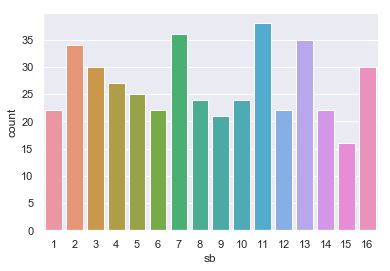

In [21]:
sns.set(style="darkgrid")
ax = sns.countplot(x="sb", data=df_sb_tr)

In [22]:
dict_sb_re = dict(df_re.sb.value_counts())
print(dict_sb_re)

{12: 35, 10: 32, 3: 32, 15: 30, 1: 30, 13: 28, 9: 28, 4: 27, 14: 25, 8: 25, 7: 25, 11: 24, 5: 23, 16: 22, 6: 22, 2: 20}


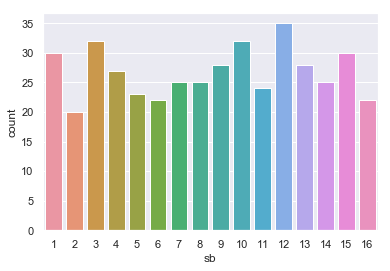

In [23]:
sns.set(style="darkgrid")
ax = sns.countplot(x="sb", data=df_sb_re)

In [24]:
dict_sb = dict(df.sb.value_counts())
print(dict_sb)

{13: 63, 11: 62, 3: 62, 7: 61, 12: 57, 10: 56, 4: 54, 2: 54, 16: 52, 1: 52, 9: 49, 8: 49, 5: 48, 14: 47, 15: 46, 6: 44}


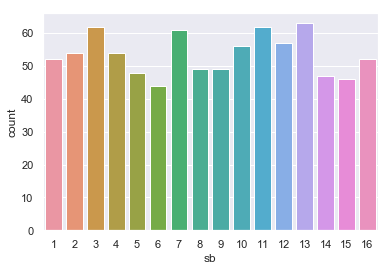

In [25]:
sns.set(style="darkgrid")
ax = sns.countplot(x="sb", data=df)

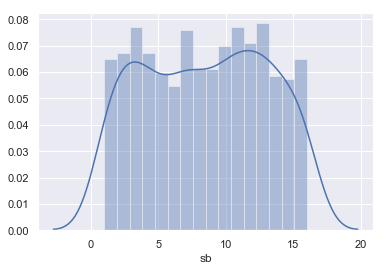

In [26]:
sns.set(style="darkgrid")
x= df.sb
ax = sns.distplot(x, bins=16)

In [27]:
#df.head()
categorical_cols = ['tipo','ganador']
unuseful_cols = ['fecha', 'nuevo']
le = LabelEncoder()

for item in categorical_cols[:]:
    if item == 'tipo' or item == 'ganador':
        nombre_col = str(item) + str('Tr')
        df_tr[nombre_col]= le.fit_transform(df_tr[item])
        nombre_col = str(item) + str('Re')
        df_re[nombre_col]= le.fit_transform(df_re[item])
#print(df_tr)
#print(df_re)


#df_tr = df_object.loc[:, (df.isin({"Tr"})).all(axis=0)]

C:\Users\Ricardo\.conda\envs\dsbasic\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Ricardo\.conda\envs\dsbasic\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [28]:
df_tr_fusion = []
df_re_fusion = []
#print(df_tr)
df_tr_fusion = df_tr.drop(unuseful_cols, axis=1)
df_re_fusion = df_re.drop(unuseful_cols, axis=1)
#print(df_tr_fusion)
df_tr_fu_filt = df_tr_fusion.iloc[:, [0,3,4,5,6,7,8]]
df_re_fu_filt = df_re_fusion.iloc[:, [0,3,4,5,6,7,8]]
Y_tr = df_tr_fusion.iloc[:, 10]
Y_re = df_re_fusion.iloc[:, 10]
filas = int(df_sb_tr.shape[0])
#print(df_tr_fu_filt)
#print(df_re_fu_filt)

In [29]:
def addcolumn(df):
    delta=[]
    for index, row in df.iterrows():
        delta.append(word_maker(row.n1, row.n2, row.n3, row.n4, row.n5))
    df['delta'] = delta
    return df

In [30]:
sorteos = df_tr_fu_filt.shape
print (df_tr_fu_filt)
print(range(sorteos[0]))

     idSorteo  n1  n2  n3  n4  n5  sb
1        2098  26  29  39  42  43   4
3        2097   6  21  22  34  36  10
5        2096   6  19  20  37  38  10
7        2095   1   5   8  14  40   8
9        2094   7   8  21  30  42   2
..        ...  ..  ..  ..  ..  ..  ..
846      1675   1  20  36  39  43  10
848      1674   5   6   7  12  37   6
850      1673   6  19  25  28  36   1
852      1672   1   2  25  31  33  14
854      1671  15  28  36  37  41  10

[428 rows x 7 columns]
range(0, 428)


In [31]:
df_tr_fu_filt_1 = df_tr_fu_filt[(df_tr_fu_filt['n1']==1) & (df_tr_fu_filt['n2']==2)]
df_tr_fu_filt_2 = df_tr_fu_filt_1[df_tr_fu_filt_1['n2']==3]
#df_tr_fu_filt_1 = df_tr_fu_filt.filter(='10', axis=0)
sorteos2 = df_tr_fu_filt_1.shape
print (df_tr_fu_filt_1)

print(range(sorteos2[0]))

     idSorteo  n1  n2  n3  n4  n5  sb
139      2029   1   2   5  16  23  11
151      2023   1   2  15  36  39   4
396      1900   1   2   3  10  31   1
416      1890   1   2  22  29  42  16
706      1745   1   2   4   5  13  10
708      1744   1   2  33  34  41  10
774      1711   1   2  20  31  43   8
852      1672   1   2  25  31  33  14
range(0, 8)


#### Se definen los archivos a los que se exportaran los dataframes que incluyen los deltas Calculados  

In [32]:
df_tr_fu_filt = addcolumn(df_tr_fu_filt)
df_tr_fu_filt.to_csv(generaPath('O', 'df_tr_fu_filt_delta.csv'), header=['idSorteo','n1','n2','n3','n4', 'n5','sb','delta'], index=None, sep=',', mode='w')
print(df_tr_fu_filt)

C:\Users\Ricardo\.conda\envs\dsbasic\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


     idSorteo  n1  n2  n3  n4  n5  sb  delta
1        2098  26  29  39  42  43   4  CJCAY
3        2097   6  21  22  34  36  10  ÑALBM
5        2096   6  19  20  37  38  10  MAPAK
7        2095   1   5   8  14  40   8  DCFYD
9        2094   7   8  21  30  42   2  AMILH
..        ...  ..  ..  ..  ..  ..  ..    ...
846      1675   1  20  36  39  43  10  ROCDA
848      1674   5   6   7  12  37   6  AAEXK
850      1673   6  19  25  28  36   1  MFCHM
852      1672   1   2  25  31  33  14  AVFBK
854      1671  15  28  36  37  41  10  MHADP

[428 rows x 8 columns]


In [33]:
print(df_re_fu_filt)
df_re_fu_filt = addcolumn(df_re_fu_filt)
df_re_fu_filt.to_csv(generaPath('O', 'df_re_fu_filt_delta.csv'), header=['idSorteo','n1','n2','n3','n4', 'n5','sb','delta'], index=None, sep=',', mode='w')
print(df_re_fu_filt)

     idSorteo  n1  n2  n3  n4  n5  sb
0        2098  23  28  35  37  38  15
2        2097   4  14  31  32  43  16
4        2096  15  16  17  39  41   9
6        2095   5   8  14  26  33   3
8        2094   2   6  28  34  38  11
..        ...  ..  ..  ..  ..  ..  ..
847      1675   3   5   8  20  24  14
849      1674   5  12  15  20  42  14
851      1673   8  21  22  37  38   4
853      1672   9  12  16  28  38   1
855      1671   3   9  10  21  40  10

[428 rows x 7 columns]
     idSorteo  n1  n2  n3  n4  n5  sb  delta
0        2098  23  28  35  37  38  15  EGBA@
2        2097   4  14  31  32  43  16  JPAKD
4        2096  15  16  17  39  41   9  AAUBP
6        2095   5   8  14  26  33   3  CFLGÑ
8        2094   2   6  28  34  38  11  DUFDG
..        ...  ..  ..  ..  ..  ..  ..    ...
847      1675   3   5   8  20  24  14  BCLDU
849      1674   5  12  15  20  42  14  GCEUF
851      1673   8  21  22  37  38   4  MAÑAM
853      1672   9  12  16  28  38   1  CDLJN
855      1671   3   9  10

C:\Users\Ricardo\.conda\envs\dsbasic\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### validar cuantas veces se repiten los deltas, para validar si existe algun patron de repeticion

In [34]:
#sorteo = df_tr_fu_filt[df_tr_fu_filt.idSorteo == '198']
#print(sorteo)
#df_tr_fu_filt.loc['n1'].tolist()
#idSorteo = '1975'
#values = df_tr_fu_filt.loc[idSorteo].tolist()
#print(values)


#### Se hacen los conteos de  los deltas y sus ocurrencias (NM Con este listado se debe validar expresiones similares para determinar comportamiento y posibles semejanzas entre ellos Ej MCACV similar a MCBCV, debe validarse que porcion de una expresion esta en la otras, a futuro deberia validarse la correlacion entre sorteo TR y sorteo RE )

In [35]:
df_tr_fu_filt.delta.value_counts()

MCACV    2
BBAFd    1
FDANQ    1
LKCLE    1
DAJAZ    1
        ..
ADJIR    1
DÑALK    1
AMHFÑ    1
EELIL    1
HAPGJ    1
Name: delta, Length: 427, dtype: int64

In [36]:
df_re_fu_filt.delta.value_counts()

MKDAN    2
BOBEQ    1
GBEXD    1
HLEHJ    1
NDGCÑ    1
        ..
CJABZ    1
CFLGÑ    1
MBAHR    1
SHEDF    1
HACNP    1
Name: delta, Length: 427, dtype: int64

In [37]:
#def transforma_unos(df_tr_fu_filt)
#    for i in range(0, df_tr_fu_filt.shape[1])
        


#### Los numeros de las columnas n1-n5 seran fusionadas, seran transformados a una sola dimension, para poder determinar la frecuencia con la que acontecen, en primera instancia seran separados por tipo de sorteo, y en el nuevo dataset tendremos el numero del sorteo y el numero

In [38]:
#print(Y_tr)
#print(Y_re)
main_columns = ['n1','n2','n3', 'n4', 'n5', 'sb','tipo', 'ganador']

#### Este contenido se usa para segmentar el dataframe en los siguientes contextos single, duplas, ternas cuartetos y quintetos con y sin superbalota

In [39]:
df

,idSorteo,fecha,tipo,ganador,nuevo,n1,n2,n3,n4,n5,sb
0,2098,2021-06-30,Re,NO,SI,23,28,35,37,38,15
1,2098,2021-06-30,Tr,NO,SI,26,29,39,42,43,4
2,2097,2021-06-26,Re,NO,SI,4,14,31,32,43,16
3,2097,2021-06-26,Tr,NO,SI,6,21,22,34,36,10
4,2096,2021-06-23,Re,NO,SI,15,16,17,39,41,9
...,...,...,...,...,...,...,...,...,...,...,...
851,1673,2017-04-29,Re,NO,SI,8,21,22,37,38,4
852,1672,2017-04-26,Tr,NO,SI,1,2,25,31,33,14
853,1672,2017-04-26,Re,NO,SI,9,12,16,28,38,1
854,1671,2017-04-22,Tr,NO,SI,15,28,36,37,41,10


In [40]:
def cortasbs(df, sb):
    
    df_filt = df.iloc[0::1,[0, 6]]
    print (df_filt)
    df_filt = df_filt.rename(columns = {'n1':'num','n2':'num','n3':'num','n4':'num','n5':'num'})
    return df_filt

In [41]:
def cortasingles(df, col0, col1):
    df_filt = df.iloc[0::1,[col0, col1]]
    print (df_filt)
    df_filt = df_filt.rename(columns = {'n1':'num','n2':'num','n3':'num','n4':'num','n5':'num'})
    return df_filt

In [42]:
def cortasinglessb(df, col0, col1, sb):
    df_filt = df.iloc[0::1,[col0, col1, sb]]
    df_filt = df_filt.rename(columns = {'n1':'num','n2':'num','n3':'num','n4':'num','n5':'num'})
    return df_filt

In [43]:
def cortaduplas(df, col0, col1, col2):
    df_filt = df.iloc[0::1,[col0, col1, col2]]
    df_filt = df_filt.rename(columns = {'n1':'num','n2':'num','n3':'num','n4':'num','n5':'num'})
    return df_filt

In [44]:
def cortaduplassb(df, col0, col1, col2, sb):
    df_filt = df.iloc[0::1,[col0, col1, col2, sb]]
    df_filt = df_filt.rename(columns = {'n1':'num','n2':'num','n3':'num','n4':'num','n5':'num'})
    return df_filt

In [45]:
def cortatrios(df, col0, col1, col2, col3):
    df_filt = df.iloc[0::1,[col0, col1, col2, col3]]
    df_filt = df_filt.rename(columns = {'n1':'num','n2':'num','n3':'num','n4':'num','n5':'num'})
    return df_filt

In [46]:
def cortatriossb(df, col0, col1, col2, col3, sb):
    df_filt = df.iloc[0::1,[col0, col1, col2, col3, sb]]
    df_filt = df_filt.rename(columns = {'n1':'num','n2':'num','n3':'num','n4':'num','n5':'num'})
    return df_filt

In [47]:
def cortacuartetos(df, col0, col1, col2, col3, col4):
    df_filt = df.iloc[0::1,[col0, col1, col2, col3, col4]]
    df_filt = df_filt.rename(columns = {'n1':'num','n2':'num','n3':'num','n4':'num','n5':'num'})
    return df_filt

In [48]:
def cortacuartetossb(df, col0, col1, col2, col3, col4, sb):
    df_filt = df.iloc[0::1,[col0, col1, col2, col3, col4, sb]]
    df_filt = df_filt.rename(columns = {'n1':'num','n2':'num','n3':'num','n4':'num','n5':'num'})
    return df_filt

In [49]:
def cortaquintetos(df, col0, col1, col2, col3, col4, col5):
    df_filt = df.iloc[0::1,[col0, col1, col2, col3, col4, col5]]
    df_filt = df_filt.rename(columns = {'n1':'num','n2':'num','n3':'num','n4':'num','n5':'num'})
    return df_filt

In [50]:
def cortaquintetossb(df, col0, col1, col2, col3, col4, col5, sb):
    df_filt = df.iloc[0::1,[col0, col1, col2, col3, col4, col5, sb]]
    df_filt = df_filt.rename(columns = {'n1':'num','n2':'num','n3':'num','n4':'num','n5':'num'})
    return df_filt

#### El siguiente contenido se usa para fusionar los dataframes desde los diferentes enfoques, singles, duplas, trios, etc

In [51]:
def concatenador_sbs(df, sb):
    colid = 0
    df_1d_sb_tr = cortasbs(df, sb) # if sb > 0 else cortasingles(df,colid,1)
    df_1d_sb_tr.columns = ['idSorteo', 'sb'] # if sb > 0 else ['idSorteo', 'num1']
    print("final: ",df_1d_sb_tr)
    return df_1d_sb_tr

In [52]:
def concatenador_singles(df, sb):
    colid = 0
    df_1d_fu_tr = cortasinglessb(df,colid,1, sb) if sb > 0 else cortasingles(df,colid,1)
    print (df_1d_fu_tr)
    inicial = 0
    for i in range(1,6):
        df_temp_fusion = cortasinglessb(df, colid, i, sb) if sb > 0 else cortasingles(df, colid, i)
        if (inicial == 0):
            df_1d_fu_tr = df_temp_fusion
            inicial += 1
        else :
            df_1d_fu_tr = pd.concat([df_1d_fu_tr, df_temp_fusion], ignore_index=True)
    df_1d_fu_tr.columns = ['idSorteo', 'num1', 'sb'] if sb > 0 else ['idSorteo', 'num1']
    return df_1d_fu_tr

In [53]:
def concatenador_duplas(df,sb):
    colid = 0
    inicial = 0
    for i in range(1,6):
        for ii in range(i+1, 6):
            df_temp_fusion = cortaduplassb(df, colid, i, ii, sb) if sb > 0 else cortaduplas(df, colid, i, ii)
            if (inicial == 0):
                df_2d_fu_tr = df_temp_fusion
                inicial += 1
            else :
                df_2d_fu_tr = pd.concat([df_2d_fu_tr, df_temp_fusion], ignore_index=True)
    df_2d_fu_tr.columns = ['idSorteo', 'num1', 'num2', 'sb'] if sb > 0 else ['idSorteo', 'num1', 'num2']
    return df_2d_fu_tr

In [54]:
def concatenador_trios(df,sb):
    colid = 0
    df_3d_fu_tr = cortatriossb(df, colid, 1, 2, 3, sb) if sb > 0 else cortatrios(df, colid, 1, 2, 3)
    inicial = 0
    for i in range(1,6):
        for ii in range(i + 1, 6):
            for iii in range(ii + 1, 6):
                df_temp_fusion = cortatriossb(df, colid, i, ii, iii, sb) if sb > 0 else cortatrios(df, colid, i, ii, iii)
                if (inicial == 0):
                    df_3d_fu_tr = df_temp_fusion
                    inicial += 1
                else :
                    df_3d_fu_tr = pd.concat([df_3d_fu_tr, df_temp_fusion], ignore_index=True)
    df_3d_fu_tr.columns = ['idSorteo', 'num1', 'num2', 'num3', 'sb'] if sb > 0 else ['idSorteo', 'num1', 'num2', 'num3']
    return df_3d_fu_tr

In [55]:
def concatenador_cuartetos(df, sb):
    colid = 0
    inicial = 0
    for i in range(1,6):
        for ii in range(i + 1, 6):
            for iii in range(ii + 1, 6 ):
                for iiii in range(iii + 1, 6 ):
                    df_temp_fusion = cortacuartetossb(df, colid, i, ii, iii, iiii, sb) if sb > 0 else cortacuartetos(df, colid, i, ii, iii, iiii)
                    if (inicial == 0):
                        df_4d_fu_tr = df_temp_fusion
                        inicial += 1
                    else :
                        df_4d_fu_tr = pd.concat([df_4d_fu_tr, df_temp_fusion], ignore_index=True)
    df_4d_fu_tr.columns = ['idSorteo', 'num1', 'num2', 'num3', 'num4', 'sb'] if sb > 0 else ['idSorteo', 'num1', 'num2', 'num3', 'num4']
    return df_4d_fu_tr

In [56]:
def concatenador_quintetos(df, sb):
    colid = 0
    df_5d_fu_tr = cortaquintetossb(df, colid, 1, 2, 3, 4, 5, sb) if sb > 0 else  cortaquintetos(df, colid, 1, 2, 3, 4, 5)
    df_5d_fu_tr.columns = ['idSorteo', 'num1', 'num2', 'num3', 'num4', 'num5', 'sb'] if sb > 0 else ['idSorteo', 'num1', 'num2', 'num3', 'num4', 'num5']
    return df_5d_fu_tr

In [57]:
def tuple_maker(ent1, ent2, ent3, ent4, ent5, cant):
    listik = []
    if (cant >= 1):
        listik.append(str(ent1))
    if (cant >= 2):       
        listik.append("|" + str(ent2))
    if (cant >= 3):
        listik.append("|" + str(ent3))
    if (cant >= 4):
        listik.append("|" + str(ent4))
    if (cant >= 5):
        listik.append("|" + str(ent5))
    palabra = "".join(listik)
    return palabra

#### Con la siguiente funcion adicionamos una nueva columna 'la de las tuplas'

In [58]:
def addcolumntuplas(df, cant):
    tupla=[]
    val_defecto = 0
    df.to_frame()
    df2 = df.rename(None).to_frame().T
    for index, row in df2.iteritems():
        if (cant == 1): 
            tupla.append(tuple_maker(index, val_defecto, val_defecto, val_defecto, val_defecto, cant)) 
        if (cant == 2):
            tupla.append(tuple_maker(index[0], index[1], val_defecto, val_defecto, val_defecto, cant))
        if (cant == 3): 
            tupla.append(tuple_maker(index[0], index[1], index[2], val_defecto, val_defecto, cant))  
        if (cant == 4): 
            tupla.append(tuple_maker(index[0], index[1], index[2], index[3], val_defecto, cant))  
        if (cant == 5): 
            tupla.append(tuple_maker(index[0], index[1], index[2], index[3], index[4], cant))  
    dft = df2.T
    dft['tupla'] = tupla
    dft = dft.reset_index(drop=True)
    return dft

#### Se definen los metodos para agrupar el contenido del dataframe en grupos de acuerdo a cantidad de numeros involucrados

In [59]:
def agrupa_sbs(df):
    conteo_nums = df.groupby(['sb']).size()
    tupla  = []
    df = addcolumntuplas(conteo_nums, 1)
    df.columns = ['conteo','tupla']
    return df

In [60]:
def agrupa_singles(df):
    conteo_nums = df.groupby(['num1']).size()
    tupla  = []
    df = addcolumntuplas(conteo_nums, 1)
    df.columns = ['conteo','tupla']
    return df

In [61]:
def agrupa_duplas(df):
    conteo_nums = df.groupby(['num1', 'num2']).size()
    tupla  = []
    df = addcolumntuplas(conteo_nums, 2)
    df.columns = ['conteo','tupla']
    return df

In [62]:
def agrupa_trios(df):
    conteo_nums = df.groupby(['num1', 'num2', 'num3']).size()
    tupla  = []
    df = addcolumntuplas(conteo_nums, 3)
    df.columns = ['conteo','tupla']
    return df

In [63]:
def agrupa_cuartetos(df):
    conteo_nums = df.groupby(['num1', 'num2', 'num3', 'num4']).size()
    tupla  = []
    df = addcolumntuplas(conteo_nums, 4)
    df.columns = ['conteo','tupla']
    return df

In [64]:
def agrupa_quintetos(df):
    conteo_nums = df.groupby(['num1', 'num2', 'num3', 'num4', 'num5']).size()
    tupla  = []
    df = addcolumntuplas(conteo_nums, 5)
    df.columns = ['conteo','tupla']
    return df

#### Aquí se hace la separacion a un dataframe de solo 1 numero

In [65]:
df_1d_sb_tr = concatenador_sbs(df_tr_fu_filt, 0)
conteos_1d_sb_tr = agrupa_sbs(df_1d_sb_tr)
conteos_1d_sb_tr.to_csv(generaPath('O', 'conteos_1d_sb_tr.csv'), header=['conteo','tupla'], index=None, sep=',', mode='w') 

     idSorteo  sb
1        2098   4
3        2097  10
5        2096  10
7        2095   8
9        2094   2
..        ...  ..
846      1675  10
848      1674   6
850      1673   1
852      1672  14
854      1671  10

[428 rows x 2 columns]
final:       idSorteo  sb
1        2098   4
3        2097  10
5        2096  10
7        2095   8
9        2094   2
..        ...  ..
846      1675  10
848      1674   6
850      1673   1
852      1672  14
854      1671  10

[428 rows x 2 columns]


In [66]:
df_1d_sb_re = concatenador_sbs(df_re_fu_filt, 0)
conteos_1d_sb_re = agrupa_sbs(df_1d_sb_re)
conteos_1d_sb_re.to_csv(generaPath('O', 'conteos_1d_sb_re.csv'), header=['conteo','tupla'], index=None, sep=',', mode='w') 

     idSorteo  sb
0        2098  15
2        2097  16
4        2096   9
6        2095   3
8        2094  11
..        ...  ..
847      1675  14
849      1674  14
851      1673   4
853      1672   1
855      1671  10

[428 rows x 2 columns]
final:       idSorteo  sb
0        2098  15
2        2097  16
4        2096   9
6        2095   3
8        2094  11
..        ...  ..
847      1675  14
849      1674  14
851      1673   4
853      1672   1
855      1671  10

[428 rows x 2 columns]


In [67]:
df_1d_fusion_tr = concatenador_singles(df_tr_fu_filt, 0)
conteos_1d_tr = agrupa_singles(df_1d_fusion_tr)
conteos_1d_tr.to_csv(generaPath('O', 'conteos_1d_tr.csv'), header=['conteo','tupla'], index=None, sep=',', mode='w')

     idSorteo  n1
1        2098  26
3        2097   6
5        2096   6
7        2095   1
9        2094   7
..        ...  ..
846      1675   1
848      1674   5
850      1673   6
852      1672   1
854      1671  15

[428 rows x 2 columns]
     idSorteo  num
1        2098   26
3        2097    6
5        2096    6
7        2095    1
9        2094    7
..        ...  ...
846      1675    1
848      1674    5
850      1673    6
852      1672    1
854      1671   15

[428 rows x 2 columns]
     idSorteo  n1
1        2098  26
3        2097   6
5        2096   6
7        2095   1
9        2094   7
..        ...  ..
846      1675   1
848      1674   5
850      1673   6
852      1672   1
854      1671  15

[428 rows x 2 columns]
     idSorteo  n2
1        2098  29
3        2097  21
5        2096  19
7        2095   5
9        2094   8
..        ...  ..
846      1675  20
848      1674   6
850      1673  19
852      1672   2
854      1671  28

[428 rows x 2 columns]
     idSorteo  n3
1        2

In [68]:
df_1d_fusion_re = concatenador_singles(df_re_fu_filt, 0)
conteos_1d_re = agrupa_singles(df_1d_fusion_re)
conteos_1d_re.to_csv(generaPath('O', 'conteos_1d_re.csv'), header=['conteo','tupla'], index=None, sep=',', mode='w')

     idSorteo  n1
0        2098  23
2        2097   4
4        2096  15
6        2095   5
8        2094   2
..        ...  ..
847      1675   3
849      1674   5
851      1673   8
853      1672   9
855      1671   3

[428 rows x 2 columns]
     idSorteo  num
0        2098   23
2        2097    4
4        2096   15
6        2095    5
8        2094    2
..        ...  ...
847      1675    3
849      1674    5
851      1673    8
853      1672    9
855      1671    3

[428 rows x 2 columns]
     idSorteo  n1
0        2098  23
2        2097   4
4        2096  15
6        2095   5
8        2094   2
..        ...  ..
847      1675   3
849      1674   5
851      1673   8
853      1672   9
855      1671   3

[428 rows x 2 columns]
     idSorteo  n2
0        2098  28
2        2097  14
4        2096  16
6        2095   8
8        2094   6
..        ...  ..
847      1675   5
849      1674  12
851      1673  21
853      1672  12
855      1671   9

[428 rows x 2 columns]
     idSorteo  n3
0        2

In [69]:
df_2d_fusion_tr = concatenador_duplas(df_tr_fu_filt, 0)
conteos_2d_tr = agrupa_duplas(df_2d_fusion_tr)
conteos_2d_tr.to_csv(generaPath('O', 'conteos_2d_tr.csv'), header=['conteo','tupla'], index=None, sep=',', mode='w')

In [70]:
df_2d_fusion_re = concatenador_duplas(df_re_fu_filt, 0)
conteos_2d_re = agrupa_duplas(df_2d_fusion_re)
conteos_2d_re.to_csv(generaPath('O', 'conteos_2d_re.csv'), header=['conteo','tupla'], index=None, sep=',', mode='w')

In [71]:
df_3d_fusion_tr = concatenador_trios(df_tr_fu_filt, 0)
conteos_3d_tr = agrupa_trios(df_3d_fusion_tr)
conteos_3d_tr.to_csv(generaPath('O', 'conteos_3d_tr.csv'), header=['conteo','tupla'], index=None, sep=',', mode='w')

In [72]:
df_3d_fusion_re = concatenador_trios(df_re_fu_filt, 0)
conteos_3d_re = agrupa_trios(df_3d_fusion_re)
conteos_3d_re.to_csv(generaPath('O', 'conteos_3d_re.csv'), header=['conteo','tupla'], index=None, sep=',', mode='w')

In [73]:
df_4d_fusion_tr = concatenador_cuartetos(df_tr_fu_filt,0)
conteos_4d_tr = agrupa_cuartetos(df_4d_fusion_tr)
conteos_4d_tr.to_csv(generaPath('O', 'conteos_4d_tr.csv'), header=['conteo','tupla'], index=None, sep=',', mode='w')

In [74]:
df_4d_fusion_re = concatenador_cuartetos(df_re_fu_filt,0)
conteos_4d_re = agrupa_cuartetos(df_4d_fusion_re)
conteos_4d_re.to_csv(generaPath('O', 'conteos_4d_re.csv'), header=['conteo','tupla'], index=None, sep=',', mode='w')

In [75]:
df_5d_fusion_tr = concatenador_quintetos(df_tr_fu_filt, 0)
conteos_5d_tr = agrupa_quintetos(df_5d_fusion_tr)
conteos_5d_tr.to_csv(generaPath('O', 'conteos_5d_tr.csv'), header=['conteo','tupla'], index=None, sep=',', mode='w')

In [76]:
df_5d_fusion_re = concatenador_quintetos(df_re_fu_filt, 0)
conteos_5d_re = agrupa_quintetos(df_5d_fusion_re)
conteos_5d_re.to_csv(generaPath('O', 'conteos_5d_re.csv'), header=['conteo','tupla'], index=None, sep=',', mode='w')

In [77]:
df_final = df_3d_fusion_tr

In [78]:
df_final

,idSorteo,num1,num2,num3
0,2098,26,29,39
1,2097,6,21,22
2,2096,6,19,20
3,2095,1,5,8
4,2094,7,8,21
...,...,...,...,...
4275,1675,36,39,43
4276,1674,7,12,37
4277,1673,25,28,36
4278,1672,25,31,33


In [79]:
#sns.set(style="darkgrid")
#ax = sns.countplot(y="num", data=df_final)

In [80]:
#sns.set(style="darkgrid")
#x= df_final.num
#ax = sns.distplot(x, bins=43)

TypeError: unsupported operand type(s) for /: 'str' and 'float'

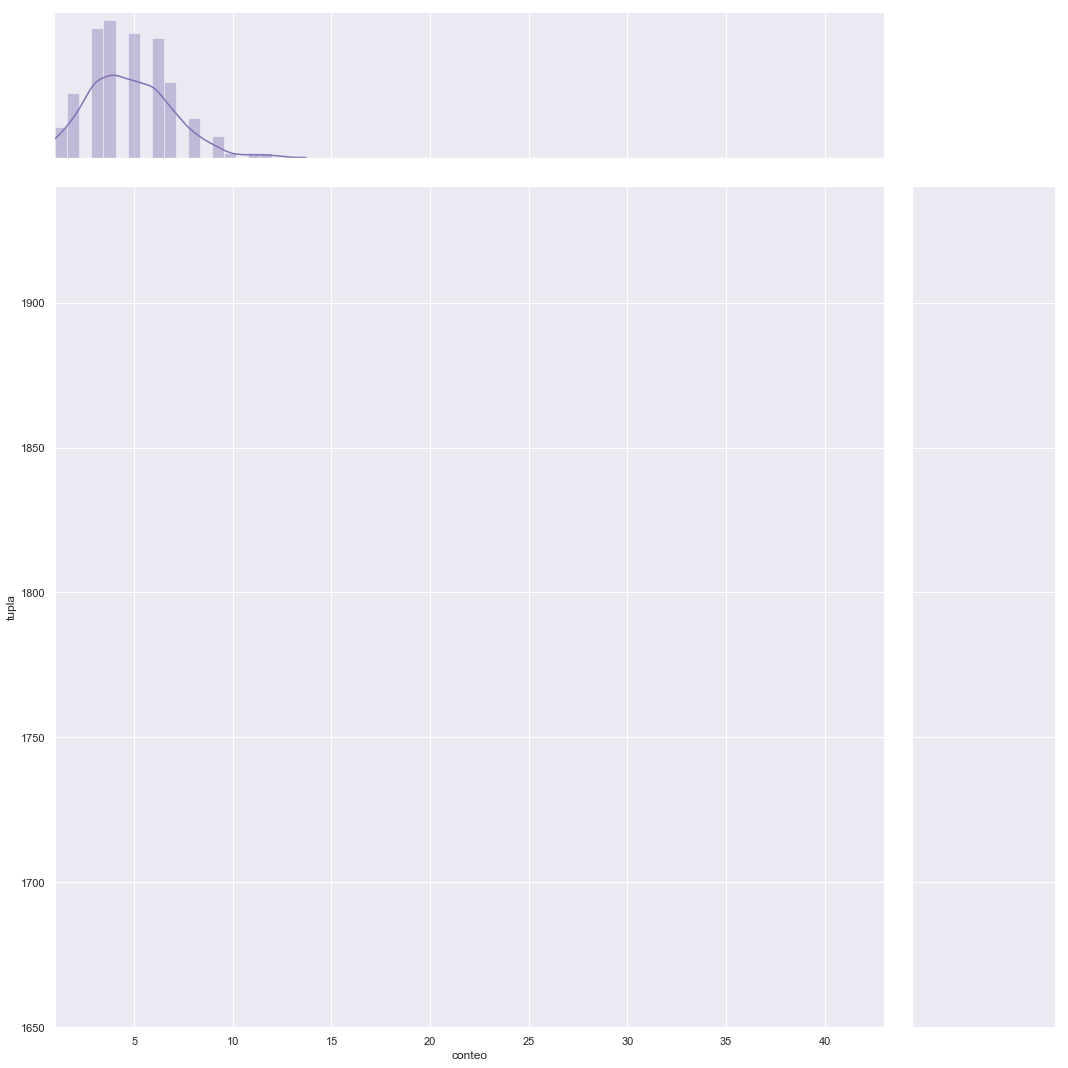

In [81]:
#df_topes = df_tr_fu_filt_delta.iloc[0::1,[0]]
g = sns.jointplot("conteo", "tupla",  data=conteos_2d_re, kind="reg", xlim=(1, 43), ylim=(1650, 1940), color="m", height=15)

In [ ]:
sns.pairplot(df_final, hue="num")

In [ ]:
grid = sns.FacetGrid(df_final, col="num", hue="num", palette="tab20c", col_wrap=4, height=4)
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.plot, "num", "idSorteo", marker="o")
grid.set(xticks=np.arange(5), yticks=[-3, 3], xlim=(-.5, 4.5), ylim=(-3.5, 3.5))
grid.fig.tight_layout(w_pad=1)

In [ ]:
a4_dims = (11.7, 8.27)
df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims)
seaborn.violinplot(ax=ax, data=df, **violin_options)

ax = sns.barplot(x="num", y="num", data=df_final, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

In [ ]:
df_conteos = df_final.num.value_counts()
df_conteos.info()

In [ ]:
sns.set(style="darkgrid")
x= df_conteos.num
ax = sns.distplot(x, bins=43)